In this notebook, we explore the insights we can leverage to calculate the speed of each vehicle before removing keypoint noise.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
f = open("/code/data/datasets/common_hall/tracking_outputs/framewise_aggregation.json")
frame_to_predictions_map = json.load(f)
f = open("/code/data/datasets/common_hall/tracking_outputs/objectwise_aggregation.json")
objects_to_predictions_map = json.load(f)['annotations'] #the object_id attribute of frame_to_predictions_map are the keys of object_to_predictions_map

In [3]:
#get all the backtire keypoints for object 0
tire_dict = {}
for i in range(len(objects_to_predictions_map)):    
    tire_dict[f'obj_{i}_back_x'] = []
    tire_dict[f'obj_{i}_back_y'] = []
    tire_dict[f'obj_{i}_front_x'] = []
    tire_dict[f'obj_{i}_front_y'] = []
col_names = list(tire_dict.keys())

In [4]:
for i in range(len(objects_to_predictions_map)):    
    object_start, object_end = objects_to_predictions_map[i]['segments'][0]#[0] to get inside the list with only a single element.
    for frame_idx in range(object_start, object_end):
        objects_per_frame = frame_to_predictions_map[frame_idx]['annotations']
        for obj_idx in range(len(objects_per_frame)):
            tire_dict[f'obj_{i}_back_x'].append(objects_per_frame[obj_idx]['keypoints'][0][0])
            tire_dict[f'obj_{i}_back_y'].append(objects_per_frame[obj_idx]['keypoints'][0][1])
            tire_dict[f'obj_{i}_front_x'].append(objects_per_frame[obj_idx]['keypoints'][1][0])
            tire_dict[f'obj_{i}_front_y'].append(objects_per_frame[obj_idx]['keypoints'][1][1])

        


In [ ]:
# object_back_tires = []
# object_front_tires = []
# for frame_idx in range(object_0_start, object_0_end):
#     object_0_back_tires.append(frame_to_predictions_map[frame_idx]['annotations'][0]['keypoints'][0])#zeros have nothing to do with object index
#     object_0_front_tires.append(frame_to_predictions_map[frame_idx]['annotations'][0]['keypoints'][1])

In [ ]:
img = cv2.imread('/code/data/datasets/images/WBuBqS9h8_216.jpg')
# plt.figure()
# plt.imshow(img)

In [ ]:
def draw_poly(_img, _pts, _color):
    pts = _pts
    pts = pts.reshape((-1, 1, 2))
    
    isClosed = False
    
    # Blue color in BGR
    color = _color
    
    # Line thickness of 2 px
    thickness = 2
    
    # Using cv2.polylines() method
    # Draw a Blue polygon with
    # thickness of 1 px
    return cv2.polylines(_img, [pts],
                        isClosed, color, thickness)


In [ ]:
back = draw_poly(img, np.array(object_0_back_tires).astype(int), (0, 0, 255))
plt.figure()
plt.imshow(back)

In [ ]:
front = draw_poly(back, np.array(object_0_front_tires).astype(int),(255, 0, 0))
plt.figure()
plt.imshow(front)

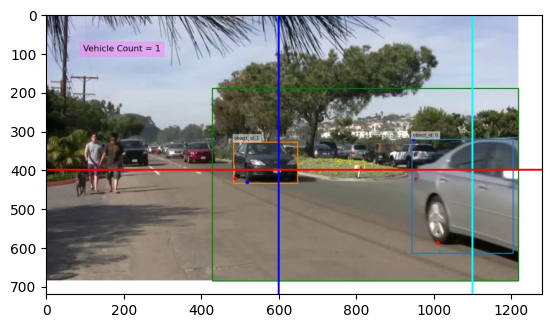

In [6]:
import cv2
import matplotlib.pyplot as plt
x1 = 600
y1 = 0
x2 = 600
y2 = 720
img = cv2.imread('/code/data/datasets/temp_imgs/0.jpg')
img = cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), thickness=4)
img = cv2.line(img, (1100, y1), (1100, y2), (255, 255, 0), thickness=4)
img = cv2.line(img, (0, 400), (1280, 400), (0, 0, 255), thickness=4)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im_rgb)

Picked position is obj_0_front_x obj_0_front_y


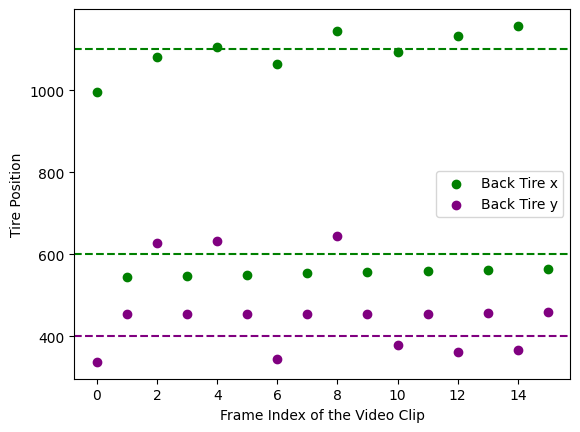

In [7]:
plt.figure
plt.xlabel("Frame Index of the Video Clip")
plt.ylabel("Tire Position")
position_x = col_names[2]
position_y = col_names[3]
print("Picked position is", position_x, position_y)
plt.scatter(range(len(tire_dict[position_x])),tire_dict[position_x],color='green',label ="Back Tire x")
plt.scatter(range(len(tire_dict[position_y])),tire_dict[position_y],color='purple', label="Back Tire y")
plt.axhline(y=400, color='purple', linestyle='--')
plt.axhline(y=600, color='green', linestyle='--')
plt.axhline(y=1100, color='green', linestyle='--')
plt.legend()

In [ ]:
objects_to_predictions_map[0]